In [1]:
import tweepy
from login_keys import consumer_key ,consumer_secret, access_token, access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [2]:
public_tweets = api.home_timeline(count=50)

In [3]:
import re

filtered_text = ""
for tweet in public_tweets:
    print(tweet.text)
    filtered_text += re.sub(r"http\S+", "", tweet.text)

RT @SoleVallejos: . @vikidonda se refiere a quiénes se oponen al #abortoLegal. "Esos diputados ¿qué piensan que pasa con los embriones crio…
Le detectaron a Mauricio Macri un quiste pancreático benigno gracias a una ecografía https://t.co/VtbAyhroaK
#ABORTO | ACTUALIZACIÓN: la definición en Diputados está empatada https://t.co/wCdGtagFMj https://t.co/JRp26IdR3e
Kalsarikänni, el hábito de Finlandia de tomar solo, en casa y en ropa interior https://t.co/JiC9K0wqSm
Un profesor chino de derecho enfrenta la asfixia política https://t.co/p2i0zu1Yg5 https://t.co/iSDE7OcZXf
#ABORTO: así está el minuto a minuto fuera del Congreso https://t.co/cvMa1VIf2T Por @naticpecoraro https://t.co/v8kcl1kvKh
RT @juanpagiordano: El diputado @Nicolas_Massot (PRO) (sobrino de Vicente Massot) voto en contra del aborto legal y acaba de decir a @vikid…
La diputada de Cambiemos Brenda Austin evocó la Reforma Universitaria que cambió para siempre la educación en la Ar… https://t.co/jQyciakCc3
Impecable @vikidonda 👏

In [4]:
filtered_text

'RT @SoleVallejos: . @vikidonda se refiere a quiénes se oponen al #abortoLegal. "Esos diputados ¿qué piensan que pasa con los embriones crio…Le detectaron a Mauricio Macri un quiste pancreático benigno gracias a una ecografía #ABORTO | ACTUALIZACIÓN: la definición en Diputados está empatada  Kalsarikänni, el hábito de Finlandia de tomar solo, en casa y en ropa interior Un profesor chino de derecho enfrenta la asfixia política  #ABORTO: así está el minuto a minuto fuera del Congreso  Por @naticpecoraro RT @juanpagiordano: El diputado @Nicolas_Massot (PRO) (sobrino de Vicente Massot) voto en contra del aborto legal y acaba de decir a @vikid…La diputada de Cambiemos Brenda Austin evocó la Reforma Universitaria que cambió para siempre la educación en la Ar… Impecable @vikidonda 👏👏👏👏👏💚💚💚💚💚💚Las críticas a Recondo por difundir que la ley amparaba el aborto hasta los 9 meses Debate en el Congreso por el #Aborto\nPara @Lipovetzky , "hay seria chance" de tener media sanción… Por qué un partido d

In [5]:
from os import path
d = path.dirname(".")
stop_words = open(path.join(d, 'spanish.txt'), encoding="utf8").read()

In [10]:
import string
from string import punctuation

In [11]:
exclude = set(string.punctuation)
s = ''.join(ch for ch in s if ch not in exclude)

NameError: name 's' is not defined

In [12]:
# lower to get better comparison
filtered_text = filtered_text.lower()
stop_words = stop_words.lower()

# added punctuation symbols used in spanish
punctuation = punctuation + "\'¿¡"

# apply filters
filtered_text = ''.join(c for c in filtered_text if c not in punctuation)
filtered_text = ' '.join([word for word in filtered_text.split() if word not in stop_words])

In [13]:
filtered_text

'solevallejos vikidonda refiere quiénes oponen abortolegal diputados piensan pasa embriones crio…le detectaron mauricio macri quiste pancreático benigno gracias ecografía aborto actualización definición diputados empatada kalsarikänni hábito finlandia tomar solo casa ropa interior profesor chino derecho enfrenta asfixia política aborto así minuto minuto congreso naticpecoraro juanpagiordano diputado nicolasmassot pro sobrino vicente massot voto aborto legal acaba decir vikid…la diputada cambiemos brenda austin evocó reforma universitaria cambió siempre educación ar… impecable vikidonda 👏👏👏👏👏💚💚💚💚💚💚las críticas recondo difundir ley amparaba aborto 9 meses debate congreso aborto lipovetzky seria chance tener media sanción… partido argentina puede llevarte guardia cómo evitarlo enfrentamiento novio hermana more rial…por aborto tnautos cifra duele cuántos niños mueren siniestros tránsito argentina aborto seguí vivo histórico debate diputados nena cinco años sufrió parálisis picadura garrapa

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

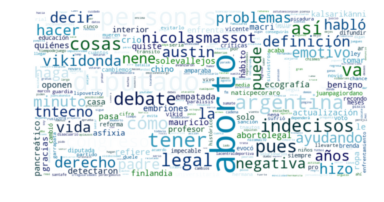

In [15]:
wordcloud = WordCloud(width=800,height=400,max_font_size=80,background_color="white",max_words=500,colormap="ocean").generate(filtered_text)
plt.figure()
plt.imshow(wordcloud, interpolation="gaussian")
plt.axis("off")
plt.show()

In [48]:
screen_name="lucasprone"

In [49]:
    #Twitter only allows access to a users most recent 3240 tweets with this method
    
    #authorize twitter, initialize tweepy

    # api = tweepy.API(auth)
    
    #initialize a list to hold all the tweepy Tweets
    alltweets = []  
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print("getting tweets before %s" % (oldest))
        
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        
        #save most recent tweets
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        
        print("...%s tweets downloaded so far" % (len(alltweets)))
    


getting tweets before 485192585724837888
...392 tweets downloaded so far
getting tweets before 357146279471620097
...592 tweets downloaded so far
getting tweets before 268553353372524543
...784 tweets downloaded so far
getting tweets before 165276610071760895
...823 tweets downloaded so far
getting tweets before 55111432219537408
...823 tweets downloaded so far


In [87]:
mis_tweets = ""
for tweet in alltweets:
    print((tweet.text))
    mis_tweets +=(tweet.text)

@daamaariis_ think different 😉 https://t.co/0qRzYLrVdP
Todavía lo tengo 🙂 https://t.co/Thx5Pw0ULX
@podzillacba Crack Seba!!! Exitos!!! 👍
RT @javierbp30: Vídeo basado en la física cuántica. Las bolitas d colores se colocan juntas solas x la resonancia d los cristales d cuarzo.…
RT @UHumanitas: Toma riesgos y que la experiencia sea tu aliada... https://t.co/Esv03Rc1rt
RT @AsocSimuladores: .@SampaoliOficial Conozco un grupo de personas que resuelven cualquier tipo de problemas https://t.co/iRhTlKjXM1
RT @Lalarrabalera: Martes 13, el culo te ABROCHO
#ChromeMusicLab, simple experiments that use the web to let anyone explore how music works. https://t.co/RI77iJGz6s
RT @infobae: Planes y sueños de Emiliano Kargieman, el ex hacker que está construyendo el "Google satelital" | Por Sebastian Catalano https…
@23Lucreh Siempre hay que tratar de hacer lo que uno ama. Lo imposible solo tarda un poco mas 🙂
@_GrinGa_ Que antigüedad el café, debería ser un latte en starbucks!!!😝
RT @LaraFidler: No impo

Goooooooooooooolllllll!!!!!!!!! #Boca
Goooooooooooooolllllll!!!!!!!!!
Póngame al tanto de la situación camarada jajaja, un maestro ravena #LosSimuladores
Tu ridículo número 20 jajaja muy groso santos #LosSimuladores
Murió el artista, nació la leyenda #ChauFlaco
Noche de lluvia para hacer el saltito de #LosSimuladores
Esperando que empiecen #LosSimuladores
Tiene cara de boludo pero así como lo ven se clava 5 pajas por día jajaja muy bueno #LosSimuladores
Simulamos Feller, simulamos #LosSimuladores
Hora de #losSimuladores
Esta tormenta es puro amague
Esperando los afiches de #boca jajaja
Goooooooooooooooooolllllllll!!!!!!!!!!!!!
@frankmb2  ctrl c, ctrl v jajaja mb
@zurdo_villegas  aunque repetidos los veo cada vez que los pasan jajaja
Viendo #LosSimuladores
Telefe insiste con las repeticiones: vuelven "Los Simuladores" http://t.co/r6YsFYy vía @clarincom
@BocaJrsOficial
#EsaCamisetaEsMia
Miro al cielo esperando un cometa
@BebeMusicTW muy bueno es especial de #TheBeatles
Como que se me agu

In [122]:
filtered_text = re.sub(r"http\S+", "", mis_tweets)

In [123]:
filtered_text

'@daamaariis_ think different 😉  lo tengo 🙂  Crack Seba!!! Exitos!!! 👍RT @javierbp30: Vídeo basado en la física cuántica. Las bolitas d colores se colocan juntas solas x la resonancia d los cristales d cuarzo.…RT @UHumanitas: Toma riesgos y que la experiencia sea tu aliada...  @AsocSimuladores: .@SampaoliOficial Conozco un grupo de personas que resuelven cualquier tipo de problemas  @Lalarrabalera: Martes 13, el culo te ABROCHO#ChromeMusicLab, simple experiments that use the web to let anyone explore how music works.  @infobae: Planes y sueños de Emiliano Kargieman, el ex hacker que está construyendo el "Google satelital" | Por Sebastian Catalano  Siempre hay que tratar de hacer lo que uno ama. Lo imposible solo tarda un poco mas 🙂@_GrinGa_ Que antigüedad el café, debería ser un latte en starbucks!!!😝RT @LaraFidler: No importa cuál sea ni q tan avanzada esté, si encontras una película de Harry Potter tenes q dejarla@JaimezJacinto Sabanas Disco, se re pone todas las noches 😝@23Lucreh 😁 

In [124]:
# lower to get better comparison
filtered_text = filtered_text.lower()

In [125]:
filtered_text

'@daamaariis_ think different 😉  lo tengo 🙂  crack seba!!! exitos!!! 👍rt @javierbp30: vídeo basado en la física cuántica. las bolitas d colores se colocan juntas solas x la resonancia d los cristales d cuarzo.…rt @uhumanitas: toma riesgos y que la experiencia sea tu aliada...  @asocsimuladores: .@sampaolioficial conozco un grupo de personas que resuelven cualquier tipo de problemas  @lalarrabalera: martes 13, el culo te abrocho#chromemusiclab, simple experiments that use the web to let anyone explore how music works.  @infobae: planes y sueños de emiliano kargieman, el ex hacker que está construyendo el "google satelital" | por sebastian catalano  siempre hay que tratar de hacer lo que uno ama. lo imposible solo tarda un poco mas 🙂@_gringa_ que antigüedad el café, debería ser un latte en starbucks!!!😝rt @larafidler: no importa cuál sea ni q tan avanzada esté, si encontras una película de harry potter tenes q dejarla@jaimezjacinto sabanas disco, se re pone todas las noches 😝@23lucreh 😁 

In [126]:
filtered_text.replace("@", " ")
filtered_text.replace(punctuation, " ")


'@daamaariis_ think different 😉  lo tengo 🙂  crack seba!!! exitos!!! 👍rt @javierbp30: vídeo basado en la física cuántica. las bolitas d colores se colocan juntas solas x la resonancia d los cristales d cuarzo.…rt @uhumanitas: toma riesgos y que la experiencia sea tu aliada...  @asocsimuladores: .@sampaolioficial conozco un grupo de personas que resuelven cualquier tipo de problemas  @lalarrabalera: martes 13, el culo te abrocho#chromemusiclab, simple experiments that use the web to let anyone explore how music works.  @infobae: planes y sueños de emiliano kargieman, el ex hacker que está construyendo el "google satelital" | por sebastian catalano  siempre hay que tratar de hacer lo que uno ama. lo imposible solo tarda un poco mas 🙂@_gringa_ que antigüedad el café, debería ser un latte en starbucks!!!😝rt @larafidler: no importa cuál sea ni q tan avanzada esté, si encontras una película de harry potter tenes q dejarla@jaimezjacinto sabanas disco, se re pone todas las noches 😝@23lucreh 😁 

In [129]:
stop_words = stop_words.lower()

# added punctuation symbols used in spanish
punctuation = punctuation + "\'¿¡"

# apply filters
filtered_text = ''.join(c for c in filtered_text if c not in punctuation)
filtered_text = ' '.join([word for word in filtered_text.split() if word not in stop_words])

In [130]:
filtered_text

'daamaariis think different 😉 🙂 crack seba exitos 👍rt javierbp30 vídeo basado física cuántica bolitas colores colocan juntas solas x resonancia cristales cuarzo…rt uhumanitas toma riesgos experiencia aliada asocsimuladores sampaolioficial conozco grupo personas resuelven cualquier tipo problemas lalarrabalera martes 13 culo abrochochromemusiclab simple experiments that use the web let anyone explore how music works infobae planes sueños emiliano kargieman ex hacker construyendo google satelital sebastian catalano siempre tratar hacer ama imposible solo tarda mas 🙂gringa antigüedad café debería latte starbucks😝rt larafidler importa cuál avanzada encontras película harry potter tenes dejarlajaimezjacinto sabanas disco pone todas noches 😝23lucreh 😁 raid mosquitos hdp 3daamaariis viernes nene sabe 😜 santatrackerhay aprender marearse alturas montaña montaña vida nunca alcanza cumbre… puso buena final poloxespnun genio pergolini gusto escucharlo 👍hermoso espectáculo coldplaybuenosaires graci

In [131]:
from collections import Counter
Counter(filtered_text.split()).most_common()[:20]

[('dormir', 31),
 ('jajaja', 29),
 ('día', 22),
 ('vía', 18),
 ('pamelacarrasc12', 18),
 ('5', 16),
 ('jajajaj', 15),
 ('feliz', 15),
 ('jajajaja', 15),
 ('ver', 14),
 ('voy', 14),
 ('nikgaturro', 14),
 ('ifrasescitas', 14),
 ('buena', 13),
 ('gente', 13),
 ('coldplay', 13),
 ('the', 12),
 ('mas', 12),
 ('nunca', 12),
 ('mundo', 12)]

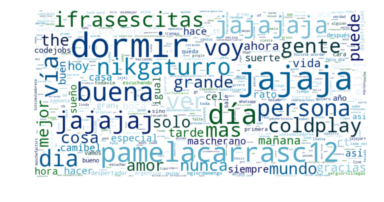

In [134]:
wordcloud = WordCloud(width=800,height=400,max_font_size=80,background_color="white",max_words=500,colormap="ocean", stopwords=stop_words).generate(filtered_text)
plt.figure()
plt.imshow(wordcloud, interpolation="gaussian")
plt.axis("off")
plt.show()